In [2]:
import os
import argparse
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset_dir = "/media/angelo/OS/Users/lasal/Desktop/Phd notes/Echocardiografy/EchoNet-LVH"
print(os.listdir(dataset_dir))

## ECconet-LVH is composed by 5 folders: 4 'Batch' with video and 'MeasurementsList.csv' with the label
# Read the label
label_dir = os.path.join(dataset_dir, 'MeasurementsList.csv')
label = pd.read_csv(label_dir, index_col=0)

['Batch1', 'Batch2', 'Batch3', 'Batch4', 'MeasurementsList.csv']


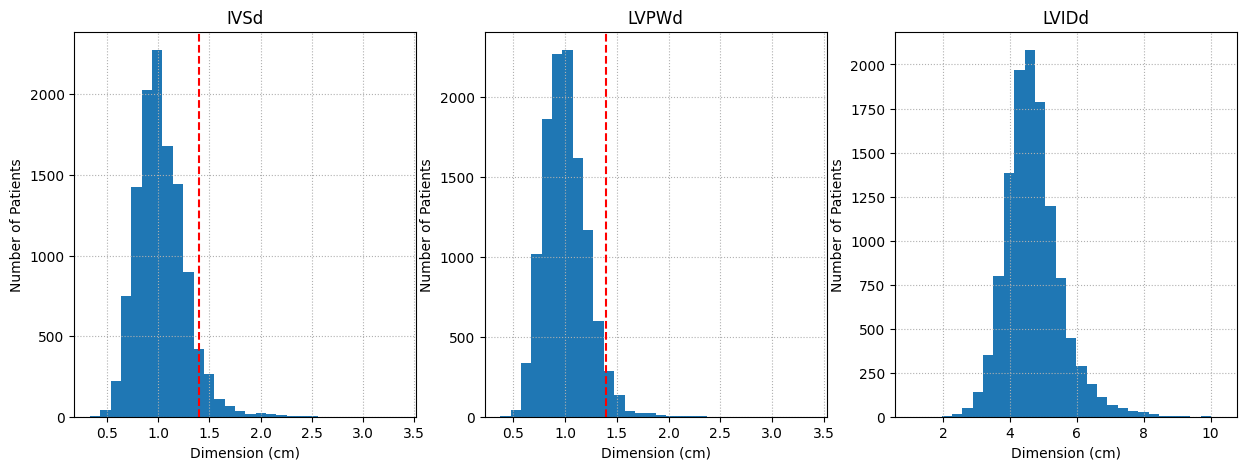

In [18]:
ivsd = label[label['Calc'] == 'IVSd']['CalcValue']
pwd = label[label['Calc'] == 'LVPWd']['CalcValue']
lvidd = label[label['Calc'] == 'LVIDd']['CalcValue']

fig , ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(ivsd, bins=30)
ax[0].set_title('IVSd')
ax[0].axvline(x=1.4, color='r', linestyle='--')
ax[0].grid(linestyle='dotted')
ax[1].hist(pwd, bins=30)
ax[1].set_title('LVPWd')
ax[1].axvline(x=1.4, color='r', linestyle='--')
ax[1].grid(linestyle='dotted')
ax[2].hist(lvidd, bins=30)
ax[2].set_title('LVIDd')
ax[2].grid(linestyle='dotted')
for a in ax:
    a.set_xlabel('Dimension (cm)')
    a.set_ylabel('Number of Patients')


In [66]:
patients = label['HashedFileName'].unique()
rwt_list = []
lv_mass_list = []
relative_distance_list = []
for patient in patients:
    patient_label = label[label['HashedFileName'] == patient]
    ivsd = patient_label[patient_label['Calc'] == 'IVSd']['CalcValue'].values
    pwd = patient_label[patient_label['Calc'] == 'LVPWd']['CalcValue'].values
    lvidd = patient_label[patient_label['Calc'] == 'LVIDd']['CalcValue'].values
    
    if len(ivsd) == 0 or len(pwd) == 0 or len(lvidd) == 0:
        print(len(ivsd), len(pwd), len(lvidd))
        print(f'Patient: {patient} has no measurements')
    
    else:
        ivsd = ivsd[0]
        pwd = pwd[0]
        lvidd = lvidd[0]

        pw_x1 = patient_label[patient_label['Calc'] == 'LVPWd']['X1'].values[0]
        pw_y1 = patient_label[patient_label['Calc'] == 'LVPWd']['Y1'].values[0]
        pw_x2 = patient_label[patient_label['Calc'] == 'LVPWd']['X2'].values[0]
        pw_y2 = patient_label[patient_label['Calc'] == 'LVPWd']['Y2'].values[0]

        pw_distance = np.sqrt((pw_x2 - pw_x1) ** 2 + (pw_y2 - pw_y1) ** 2)

        lvid_x1 = patient_label[patient_label['Calc'] == 'LVIDd']['X1'].values[0]
        lvid_y1 = patient_label[patient_label['Calc'] == 'LVIDd']['Y1'].values[0]
        lvid_x2 = patient_label[patient_label['Calc'] == 'LVIDd']['X2'].values[0]
        lvid_y2 = patient_label[patient_label['Calc'] == 'LVIDd']['Y2'].values[0]

        lvid_distance = np.sqrt((lvid_x2 - lvid_x1) ** 2 + (lvid_y2 - lvid_y1) ** 2)
        relative_distance = 2 * pw_distance / lvid_distance
        
        rwt = 2 * pwd / lvidd
        lv_mass = 0.8 * (1.04 * ((lvidd + ivsd + pwd) ** 3 - lvidd ** 3)) + 0.6
        print(f'rwt: {rwt}, lv_mass: {lv_mass}')
        print(f'relative distance: {relative_distance}')
        print(f'pw: {pw_distance}, lvid: {lvid_distance}')
        rwt_list.append(rwt)
        lv_mass_list.append(lv_mass)
        relative_distance_list.append(relative_distance)
    print('==============================================') 
    



rwt: 0.3039652238092117, lv_mass: 166.035656100224
relative distance: 0.3039652237795938
pw: 37.12142238654117, lvid: 244.24782496472716
rwt: 0.38074553497131325, lv_mass: 90.83677496846731
relative distance: 0.38074553520526383
pw: 36.76955262170047, lvid: 193.14502323383846
rwt: 0.5334644772394961, lv_mass: 196.04669269294064
relative distance: 0.5334644774113539
pw: 42.20189569201838, lvid: 158.21820375671064
rwt: 0.30077619806644534, lv_mass: 133.77581369356992
relative distance: 0.3007761979338181
pw: 29.546573405388315, lvid: 196.468827043885
rwt: 0.6543840977542346, lv_mass: 180.58186182749046
relative distance: 0.6543840976103859
pw: 50.566787519082126, lvid: 154.5477272560163
rwt: 0.3511990788758917, lv_mass: 203.770664575828
relative distance: 0.3511990788750965
pw: 42.485291572496, lvid: 241.9442084448396
rwt: 0.30901929758773683, lv_mass: 116.01397494674882
relative distance: 0.3090192973799618
pw: 38.600518131237564, lvid: 249.8259394058191
rwt: 0.5692429756989467, lv_mass

KeyboardInterrupt: 

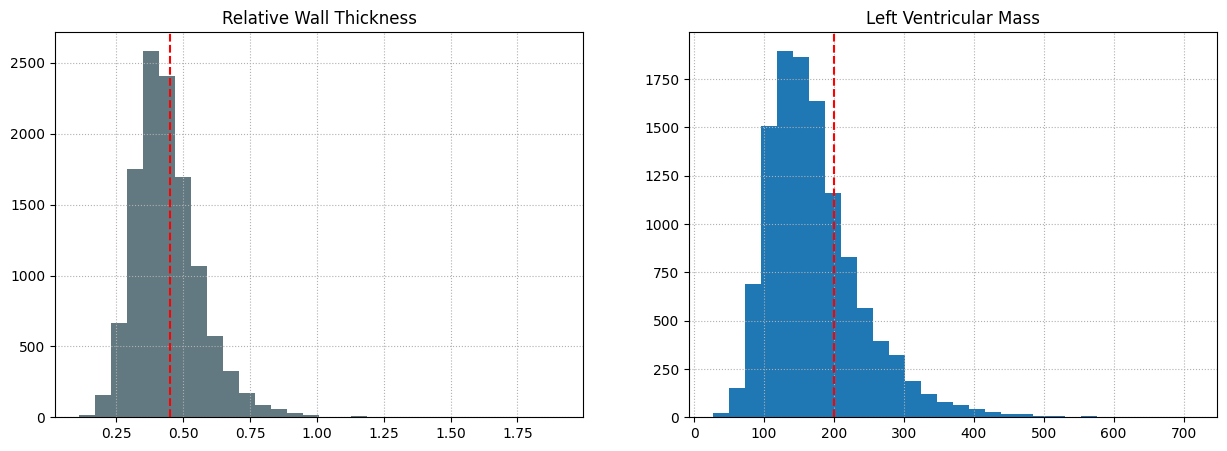

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(rwt_list, bins=30)
ax[0].hist(relative_distance_list, bins=30, alpha=0.3)
ax[0].set_title('Relative Wall Thickness')
ax[0].axvline(x=0.45, color='r', linestyle='--')
ax[0].grid(linestyle='dotted')
ax[1].hist(lv_mass_list, bins=30)
ax[1].axvline(x=200, color='r', linestyle='--')
ax[1].set_title('Left Ventricular Mass')
ax[1].grid(linestyle='dotted')
